In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import scipy as sp
import nltk
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import math 
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
#import contractions
from bs4 import BeautifulSoup
import unicodedata
import nltk 
nltk.download('stopwords')
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
import pylab
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm 
from scipy import stats 
from statsmodels.stats.weightstats import ztest
from matplotlib import rcParams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nazanin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv(r'C:\Users\Nazanin\Downloads\drugsCom_raw\drugsComTest_raw.csv', sep="\t")
df1 = pd.read_csv(r'C:\Users\Nazanin\Downloads\drugsCom_raw\drugsComTrain_raw.csv', sep="\t")
#display(df, df1)

In [3]:
df2 = df.append(df1)
list(df2)

['Unnamed: 0',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [4]:
df2 = df2.reset_index(drop=True)

In [5]:
df2

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed ...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done very well on the Asacol. He has no complaints and shows no side effects. He has taken as many as nine tablets per day at one time. I&#039;ve been v...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused ...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out ...",9.0,"October 22, 2015",4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms and face. Put vaseline on lips, under eyes and in nostrils to protect from cream. So far no reaction at all. I know I have many pre cancer and thought...",4.0,"July 3, 2014",13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t be...",6.0,"June 6, 2016",1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on it for 2 weeks and in the last week I only had 3 headaches which went away with 2 Tylenol. I was having chronic daily headaches that wouldn&#039;t go...",9.0,"April 21, 2009",32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and currently,I am trying to get off of this drug. Ive been decreasing my does 2 mgs per month for over a year. I am at 3 mgs and really starting to feel ...",7.0,"October 18, 2016",21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It does work as far as not getting pregnant however my experience at first was it didn&#039;t make a huge difference then 6 or 7 months into it my sex dri...",2.0,"April 16, 2011",3


In [7]:
df2.drugName.value_counts()[:10]

Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Name: drugName, dtype: int64

In [8]:
df2.condition.value_counts()[:10]

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

In [13]:
print(df2[df2['condition'] == 'Birth Control'].review)

4         "I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out ...
6         "I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t be...
9         "I was on this pill for almost two years. It does work as far as not getting pregnant however my experience at first was it didn&#039;t make a huge difference then 6 or 7 months into it my sex dri...
30        "I absolutely love this product and recommend to everyone. I know everyone&#039;s body is different, so it is not for everyone, but it is not the medicines fault. I have NO negative symptoms since...
37        "I was on this for 5 years (and birth control pills for about 12 years), and would have told you how fabulous it was.  &lt;List all the benefits every

In [16]:
print(df2[df2['condition'] == 'Anxiety'].review)

48                                                                                                                                                                                                 "Works for me"
63        "I was prescribed this for onset of anxiety and possible hormonal mood swings. I was not told by my doctor how it would make me feel or how hard coming off of it would be. I took one 37.5 mg capsu...
83        "I did not like this medication. For anxiety, I have also tried Hydroxyzine (Atarax). I guess this is just my personal body chemistry but I actually prefer Atarax to this unlike most people. This ...
133       "I&#039;m a 32 year old male and I&#039;ve been taking buspar for about 10 months. At first it did nothing but make my anxiety worse. I would wake up with to full blown panic attacks and have the ...
208       "Klonopin is a very effective medicine for people such as myself that suffer from debilitating panic disorder and/or PTSD.  This medicine saved me fro

## NLP 
+ On the Machine Learning phase, we start looking at the text documents of the review column. In order to do that, we need to do some text pre-processing. We process and tokenize corpus of reviews to build features for predictive models. Also, train machine learning models to predict drug rating based on reviews and relevant metadata.


### Text pre-processing

+ Removing tags: Removing unnecessary HTML tags, etc. which do not add much value when analyzing text (The BeautifulSoup library does an excellent job in providing necessary functions for this.).

+ Removing accented characters: Removing  accented characters\letters in the text corpus and convert these characters and standardized into ASCII characters, an example is to convert é to e. 

+ Expanding contractions: Converting contraction to its expanded, original form often helps with text standardization, example of which would be, "do not" to "don’t" and "I would" to "I’d".

+ Removing special characters: Removing special characters and symbols often add to the extra noise in unstructured text. More than often, simple regular expressions (regexes) can be used to achieve this.

+ Stemming and lemmatization: The reverse process of inflection is called stemming, which is basically obtaining the base form of a word. Lemmatization is very similar to stemming, the difference being that the root word from lemmatization is always a lexicographically correct word but the root stem may not be so.

+ Removing stopwords: Words with little or no significance in text corpus are known as stopwords, example of which are:  a, an, the. We can use a standard English language stopwords list from nltk and also add our own domain specific stopwords as needed.

+ Other text cleaning to do would be tokenization, removing extra whitespaces, text lower casing as well as spelling corrections, grammatical error corrections, removing repeated characters to name a few. 

In [ ]:
#en_stopws = stopwords.words('english')  # this loads the default stopwords list for English
#en_stopws.append('</span> users found this comment helpful.')  # add any words you don't like to the list </span> users found this comment helpful.

In [5]:
# Let's remove special characters, extra whitespaces, digits, stopwords and lower casing the text corpus
#result = re.sub(pattern, repl, string, count=0, flags=0);
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)   ###plscheck this 
wpt = nltk.WordPunctTokenizer()  # $4.99 
stop_words = nltk.corpus.stopwords.words('english')
stop_words.append('</span> users found this comment helpful.')
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) #re.I A means treats . as whatever it is. Performs case-insensitive matching. #issues with FLAGS!!!!!
    doc = doc.lower()
    doc = doc.strip()
    #doc = doc.#### stem ???? QUESTION 
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words] 
    filtered_tokens = [stemmer.stem(word) for word in filtered_tokens]  ###pls check this
                                                    #though I believe it's correct (I compared to the text without stemming)
                                                    # refer to cell 27 for comparision
    #filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc
normalize_corpus = np.vectorize(normalize_document)
# doc is the list of strings

In [6]:
norm_corpus = normalize_corpus(df2[df2['condition'] == 'Birth Control'].review)

In [7]:
norm_corpus

array(['birth control one cycl read review type similar birth control bit apprehens start im give birth control long enough far love birth control side effect minim like im even birth control experienc mild headach nausea ive feel great got period cue third day inact pill idea come zero pms period light bare cramp unprotect sex first month obvious didnt get pregnant im pleas high recommend',
       'ive copper coil month realli excit thought take hormon im good pain howev near faint insert couldnt beliv pain doctor say pain well month period last day im pain day random twang especi left side im consid whether want put intens pain heavi period id recommend somebodi doesnt alreadi heavi pain period right isnt',
       'pill almost two year work far get pregnant howev experi first didnt make huge differ month sex drive went along dri moodi increas drastic would cri one second get angri husband anyth everyth skin gotten lot wors broke place never last week yaz',
       ...,
       'experi 

In [17]:
from astropy.table import Table, Column

In [ ]:
names = ['birth_control_review','rating']
weights = [0.05, 0.1, 0.25]
costs = [2.0, 5.0, 3.0]
unit_costs = [40.0, 50.0, 12.0]
names = ['bar', 'chocolate', 'chips']

titles = ['names', 'weights', 'costs', 'unit_costs']
data = [titles] + list(zip(names, weights, costs, unit_costs))

for i, d in enumerate(data):
    line = '|'.join(str(x).ljust(12) for x in d)
    print(line)
    if i == 0:
        print('-' * len(line))

In [19]:
birth_control_review = [normalize_corpus(df2[df2['condition'] == 'Birth Control'].review)]
rating = [df2[df2['condition'] == 'Birth Control'].rating]
titles = ['birth_control_reviews', 'rating']
data = [titles] + list(zip(birth_control_review, rating))
for i, d in enumerate(data):
    line = '|'.join(str(x).ljust(12) for x in d)
    print(line)
    if i == 0:
        print('-' * len(line))

birth_control_reviews|rating      
----------------------------------
['birth control one cycl read review type similar birth control bit apprehens start im give birth control long enough far love birth control side effect minim like im even birth control experienc mild headach nausea ive feel great got period cue third day inact pill idea come zero pms period light bare cramp unprotect sex first month obvious didnt get pregnant im pleas high recommend'
 'ive copper coil month realli excit thought take hormon im good pain howev near faint insert couldnt beliv pain doctor say pain well month period last day im pain day random twang especi left side im consid whether want put intens pain heavi period id recommend somebodi doesnt alreadi heavi pain period right isnt'
 'pill almost two year work far get pregnant howev experi first didnt make huge differ month sex drive went along dri moodi increas drastic would cri one second get angri husband anyth everyth skin gotten lot wors broke place

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [9]:
cv_2gram = CountVectorizer(ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=500) 


In [52]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [53]:
get_top_n_words(normalize_corpus(df2[df2['condition'] == 'Birth Control'].review), n=None)

[('period', 37273),
 ('month', 36515),
 ('pill', 26390),
 ('get', 23071),
 ('ive', 21923),
 ('day', 21659),
 ('im', 20430),
 ('year', 19498),
 ('control', 18934),
 ('week', 18639),
 ('birth', 18338),
 ('take', 18146),
 ('first', 17184),
 ('cramp', 16278),
 ('gain', 15381),
 ('weight', 15367),
 ('start', 15324),
 ('effect', 14001),
 ('got', 13875),
 ('time', 13647),
 ('pain', 13167),
 ('like', 13144),
 ('side', 12075),
 ('bleed', 11932),
 ('would', 11297),
 ('insert', 11113),
 ('feel', 10858),
 ('sinc', 10519),
 ('mood', 10392),
 ('acn', 10089),
 ('never', 9849),
 ('spot', 9770),
 ('sex', 9433),
 ('bad', 9376),
 ('go', 9145),
 ('use', 9100),
 ('also', 9021),
 ('one', 8951),
 ('last', 8476),
 ('dont', 8321),
 ('swing', 7808),
 ('stop', 7654),
 ('realli', 7533),
 ('everi', 7411),
 ('love', 7376),
 ('tri', 7358),
 ('back', 7285),
 ('didnt', 7027),
 ('work', 6968),
 ('two', 6917),
 ('doctor', 6477),
 ('switch', 6289),
 ('recommend', 6208),
 ('drive', 6189),
 ('experi', 6111),
 ('thing', 600

In [56]:
common_words_BC = get_top_n_words(normalize_corpus(df2[df2['condition'] == 'Birth Control'].review), 20)
for word, freq in common_words_BC:
    print(word, freq)

period 37273
month 36515
pill 26390
get 23071
ive 21923
day 21659
im 20430
year 19498
control 18934
week 18639
birth 18338
take 18146
first 17184
cramp 16278
gain 15381
weight 15367
start 15324
effect 14001
got 13875
time 13647


In [10]:
cv_matrix_2gram = cv_2gram.fit_transform(norm_corpus)   #due to memory error  [20:40]   CONVERT words to number 
cv_matrix_2gram = cv_matrix_2gram.toarray()

In [25]:
cv_2gram

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=500, min_df=0.1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [26]:
cv_matrix_2gram 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [20]:
# get all unique words in the corpus
vocab_2gram = cv_2gram.get_feature_names() 
# show document feature vectors             
pd.DataFrame(cv_matrix_2gram, columns=vocab_2gram)   

,acn,ago,almost,also,back,bad,birth,birth control,bleed,bodi,...,two,use,want,week,weight,weight gain,went,work,would,year
0,0,0,0,0,0,0,5,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,1,1
3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,3,3,0,0,...,0,0,0,0,0,0,0,0,2,2
5,2,0,0,1,0,0,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1,1,0,1,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,2,1,1,0,0,...,0,0,0,0,0,0,0,0,2,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1,0


In [50]:
vocab_2gram

['acn',
 'ago',
 'almost',
 'also',
 'back',
 'bad',
 'birth',
 'birth control',
 'bleed',
 'bodi',
 'chang',
 'control',
 'cramp',
 'day',
 'depress',
 'didnt',
 'differ',
 'doctor',
 'dont',
 'drive',
 'effect',
 'even',
 'ever',
 'everi',
 'experi',
 'experienc',
 'far',
 'feel',
 'felt',
 'first',
 'gain',
 'get',
 'go',
 'good',
 'got',
 'great',
 'havent',
 'headach',
 'heavi',
 'im',
 'insert',
 'ive',
 'last',
 'light',
 'like',
 'littl',
 'lot',
 'love',
 'made',
 'month',
 'mood',
 'mood swing',
 'much',
 'never',
 'normal',
 'notic',
 'one',
 'pain',
 'period',
 'pill',
 'pregnant',
 'problem',
 'put',
 'realli',
 'recommend',
 'say',
 'sex',
 'sex drive',
 'side',
 'side effect',
 'sinc',
 'spot',
 'start',
 'still',
 'stop',
 'swing',
 'switch',
 'take',
 'thing',
 'think',
 'time',
 'took',
 'tri',
 'two',
 'use',
 'want',
 'week',
 'weight',
 'weight gain',
 'went',
 'work',
 'would',
 'year']

In [21]:
# birth control reviews (bcr)
bcr = cv_2gram.transform(norm_corpus)  

In [22]:
pd.DataFrame({'count':np.ravel(bcr.sum(axis=0)),'names':vocab_2gram})

,count,names
0,10089,acn
1,4552,ago
2,5473,almost
3,9021,also
4,7285,back
5,9376,bad
6,18338,birth
7,17613,birth control
8,11932,bleed
9,4972,bodi


In [23]:
bcr_df = pd.DataFrame({'count':np.ravel(bcr.sum(axis=0)),'names':vocab_2gram})

In [24]:
bcr_df =  pd.DataFrame(data=bcr_df)

In [25]:
type(bcr_df)

pandas.core.frame.DataFrame

In [26]:
bcr_df

,count,names
0,10089,acn
1,4552,ago
2,5473,almost
3,9021,also
4,7285,back
5,9376,bad
6,18338,birth
7,17613,birth control
8,11932,bleed
9,4972,bodi


In [69]:
bcr_df.groupby('names')['count'].value_counts(sort=True, ascending=False)[:20] #['names']

names          count
acn            10089    1
ago            4552     1
almost         5473     1
also           9021     1
back           7285     1
bad            9376     1
birth          18338    1
birth control  17613    1
bleed          11932    1
bodi           4972     1
chang          5077     1
control        18934    1
cramp          16278    1
day            21659    1
depress        5897     1
didnt          7027     1
differ         5128     1
doctor         6477     1
dont           8321     1
drive          6189     1
Name: count, dtype: int64

In [75]:
bcr_df.groupby('names')['count']

In [27]:
bcr_df['names'].value_counts(sort=True, ascending=False)[:20]

got          1
use          1
sinc         1
experienc    1
chang        1
time         1
depress      1
start        1
side         1
pain         1
month        1
want         1
last         1
mood         1
realli       1
would        1
great        1
acn          1
differ       1
like         1
Name: names, dtype: int64

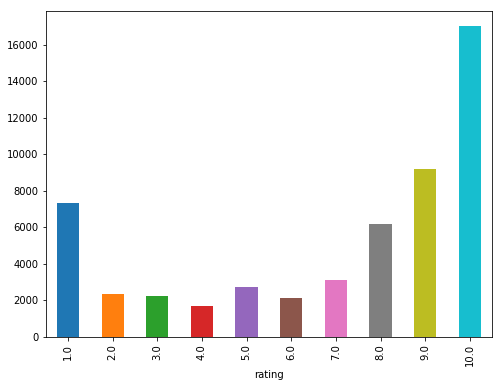

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('rating').review.count().plot.bar(ylim=0)
plt.show()

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Birth Control').review.count().plot.bar(ylim=0)
plt.show()

KeyError: 'Birth Control'

<Figure size 576x432 with 0 Axes>

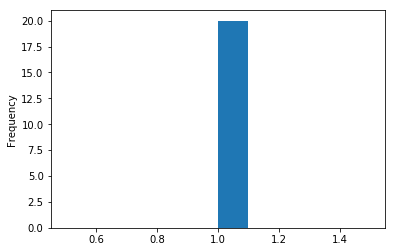

In [28]:
bcr_df['names'].value_counts(sort=True, ascending=False)[:20].plot(kind ='hist')

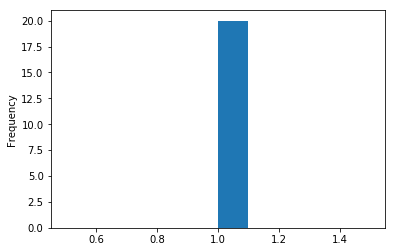

In [77]:
bcr_df.groupby('names')['count'].value_counts(sort=True, ascending=False)[:20].plot(kind ='hist')

KeyError: '[(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)] not in index'

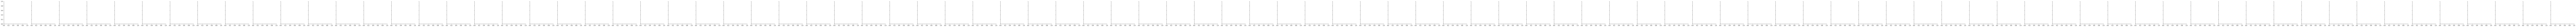

In [31]:
g = sns.FacetGrid(data=bcr_df, col='count')
g.map(plt.hist, bcr_df['names'].value_counts(sort=True, ascending=False)[:20], bins=50)

KeyError: '[(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)] not in index'

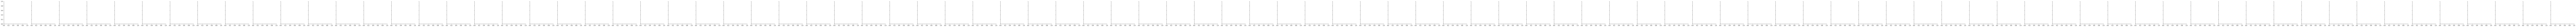

In [30]:
g = sns.FacetGrid(data=bcr_df, col='count')
g.map(plt.hist, bcr_df.groupby('names')['count'].value_counts(sort=True, ascending=False)[:20], bins=50)

##### Bag of Words Model

The bag of words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0) or even weighted values. The model’s name is such because each document is represented literally as a ‘bag’ of its own words, disregarding word orders, sequences and grammar, hence, the Bag of Words model doesn’t consider order of words.

In [ ]:
#cvec=CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)


In [9]:
norm_corpus.shape

(200,)

In [10]:
n2 = norm_corpus

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [13]:
n2

array(['ive tri antidepress year citalopram fluoxetin amitriptylin none help depress insomnia amp anxieti doctor suggest chang onto mg mirtazapin medicin save life thank side effect especi common weight gain ive actual lost alot weight still suicid thought mirtazapin save',
       'son crohn diseas done well asacol complaint show side effect taken mani nine tablet per day one time ive happi result reduc bout diarrhea drastic',
       'quick reduct symptom',
       'contrav combin drug use alcohol smoke opioid cessat peopl lose weight also help control over doubt obes caus sugarcarb addict power drug take five day good news seem go work immedi feel hungri want food realli dont care eat fill stomach sinc day dont know ive lost weight dont scale cloth feel littl looser mayb pound two im hope month medic develop healthier habit continu without aid contrav',
       'birth control one cycl read review type similar birth control bit apprehens start im give birth control long enough far love b

In [ ]:
# tfidfVectorizer and TfidfTransformer? 
# TfidfVectorizer is Equivalent to CountVectorizer followed by TfidfTransformer.
# That is, you start with a corpus of raw texts. In order to get to a sparse matrix of TF/IDF values, you:
# first need to tokenize,
# then count tokens,
# then transform the raw counts to TF/IDF Values.
# TfIdfVectorizer does items 1–3. TfidfTransformer starts with counts, and does just item 3.

In [33]:
grp

NameError: name 'grp' is not defined

In [39]:
bcr_df.columns

Index(['count', 'names'], dtype='object')

In [43]:
counts = bcr_df.names.count() 

In [41]:
counts

93

In [22]:
cv_2gram = CountVectorizer(ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=500) 


In [23]:
cv_matrix_2gram = cv_2gram.fit_transform(n2)   #due to memory error  [20:40]   CONVERT words to number 
cv_matrix_2gram = cv_matrix_2gram.toarray()

In [24]:
# get all unique words in the corpus
vocab_2gram = cv_2gram.get_feature_names() 
# show document feature vectors             
pd.DataFrame(cv_matrix_2gram, columns=vocab_2gram).head()   
# pls compare to 2 cells down, Cell[34], to see the diffrecne and the imporovement already :) 
# all the nonsense words are out :))))

,acn,ago,almost,also,anxieti,back,bad,birth,birth control,control,...,took,tri,two,use,want,week,went,work,would,year
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,1,0,0,1,0,0
4,0,0,0,0,0,0,0,5,5,5,...,0,0,0,0,0,0,0,0,0,0


In [25]:
first200 = cv_2gram.transform(n2)

In [28]:
pd.DataFrame({'count':np.ravel(first200.sum(axis=0)),'names':vocab_2gram})

,count,names
0,38,acn
1,22,ago
2,23,almost
3,43,also
4,28,anxieti
5,26,back
6,30,bad
7,35,birth
8,35,birth control
9,41,control


In [21]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=500)), ('tfidf', TfidfTransformer(n2)),
('clf', MultinomialNB()),])

In [ ]:
cv_2gram = CountVectorizer(ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=500)

In [ ]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
('clf', MultinomialNB()),])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [ ]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv_2gram = CountVectorizer(ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=500) 
#cv_2gram

In [10]:
cv_matrix_2gram = cv_2gram.fit_transform(n2)   #due to memory error  [20:40]   CONVERT words to number 
cv_matrix_2gram = cv_matrix_2gram.toarray()

In [12]:
# get all unique words in the corpus
vocab_2gram = cv_2gram.get_feature_names() 
# show document feature vectors             
pd.DataFrame(cv_matrix_2gram, columns=vocab_2gram).head()   
# pls compare to 2 cells down, Cell[34], to see the diffrecne and the imporovement already :) 
# all the nonsense words are out :))))

,acn,ago,almost,also,anxieti,back,bad,birth,birth control,control,...,took,tri,two,use,want,week,went,work,would,year
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,1,0,0,1,0,0
4,0,0,0,0,0,0,0,5,5,5,...,0,0,0,0,0,0,0,0,0,0


In [13]:
cv_2gram

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=500, min_df=0.1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
pd.DataFrame({'count':np.ravel(first200.sum(axis=0)),'names':vocab_2gram})

,count,names
0,38,acn
1,22,ago
2,23,almost
3,43,also
4,28,anxieti
5,26,back
6,30,bad
7,35,birth
8,35,birth control
9,41,control


In [15]:
first200 = cv_2gram.transform(n2)

In [22]:
np.ravel(first200.sum(axis=0))

array([ 38,  22,  23,  43,  28,  26,  30,  35,  35,  41,  28, 116,  32,
        36,  31,  64,  54,  33,  62,  79,  49,  36,  33,  39,  26,  76,
        69,  33,  22,  24,  53,  26,  47,  35,  62,  97,  34,  26,  39,
        59,  62,  45,  35,  32,  53,  42,  25,  31,  73,  31,  30, 105,
        28,  63,  33,  45,  34,  41,  24,  58,  38,  62,  52,  89],
      dtype=int64)

In [20]:
f200arr = first200.toarray()

In [29]:
#from collections import Counter
#c = Counter(['birth','anxiety','pain'])
#c = Counter(f200arr)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)   #float 
cv_matrix = cv.fit_transform(n2)   #due to memory error  [20:40]   CONVERT words to number 
cv_matrix = cv_matrix.toarray()   #visualization purposes 
#cv_matrix

In [34]:
# get all unique words in the corpus
vocab = cv.get_feature_names()    #shows every single word 
# show document feature vectors                 # number of word occurences in each row of the review column
pd.DataFrame(cv_matrix, columns=vocab)      #won't show due to commenting on the third line of above cell

,aa,aaa,aampd,ab,abated,abc,abcs,abdomen,abdominal,abi,...,zombie,zonked,zovia,zovirax,zpack,zpak,zubsolv,zumba,zyprexa,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In the above cell, we can clearly see that each column (dimension) in the feature vectors represents a word from the text corpus and each row represents one of our review rows. The value in any cell, represents the number of times that word (represented by column) occurs in the specific document (represented by row). 
Hence, if a text corpus consists of N unique words across all the documents, we would have an N-dimensional vector for each of the documents.

In [36]:
type(cv_matrix)

numpy.ndarray

In [ ]:
# get all unique words in the corpus
vocab_2gram = cv_2gram.get_feature_names()   
# show document feature vectors             
pd.DataFrame(cv_matrix_2gram, columns=vocab_2gram)   

In [ ]:
 #you can set the n-gram range to 1,2 to get unigrams as well as bigrams

    #In case needed
    
    
#bv = CountVectorizer(ngram_range=(2,2))
#bv_matrix = bv.fit_transform(norm_corpus)

#bv_matrix = bv_matrix.toarray()
#vocab = bv.get_feature_names()
#pd.DataFrame(bv_matrix, columns=vocab)

##### TF-IDF Model

Since the Bag of Words model is based on absolute term frequency, it can cause issues when dealing with large text corpus as there might be some terms which occur frequently across all documents and these may tend to overshadow other terms in the feature set. 
We can overcome this problem by using TF-IDF model by using a scaling or normalizing factor in its computation, which uses a combination of two metrics in its computation, namely: term frequency (tf) and inverse document frequency (idf). TF-IDF stands for Term Frequency-Inverse Document Frequency.

+ tf(w, D) represents the term frequency of the word "w" in document "D", which can be obtained from the Bag of Words model. The term idf(w, D) is the inverse document frequency for the term "w", which can be computed as the log transform of the total number of documents in the corpus "C" divided by the document frequency of the word "w", which is basically the frequency of documents in the corpus where the word "w" occurs. There are multiple variants of this model but they all end up giving quite similar results. Let’s apply this on our corpus now!

In [ ]:
#cv_2gram = CountVectorizer(ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)


In [20]:
print(vocab)

['aid', 'almost', 'also', 'anxieti', 'away', 'better', 'birth', 'bit', 'care', 'come', 'control', 'day', 'didnt', 'doctor', 'done', 'dont', 'dose', 'drastic', 'drug', 'eat', 'effect', 'especi', 'even', 'extrem', 'far', 'feel', 'first', 'get', 'give', 'go', 'good', 'great', 'headach', 'heavi', 'help', 'high', 'hope', 'howev', 'im', 'insert', 'ive', 'know', 'last', 'light', 'like', 'littl', 'lost', 'lot', 'made', 'make', 'mani', 'mayb', 'medic', 'medicin', 'mg', 'month', 'moodi', 'next', 'one', 'per', 'period', 'pill', 'place', 'pregnant', 'put', 'quit', 'realli', 'recommend', 'seem', 'sex', 'short', 'side', 'skin', 'sleep', 'smoke', 'start', 'still', 'stress', 'take', 'think', 'thought', 'time', 'took', 'tri', 'two', 'use', 'want', 'watch', 'week', 'weight', 'well', 'went', 'work', 'would', 'year']


In [19]:
print(tv_matrix)

[[0.         0.         0.         ... 0.         0.         0.1910181 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.22152373 ... 0.         0.40585607 0.        ]
 [0.30993411 0.         0.27966758 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [26]:
type(vocab)

list

In [25]:
from collections import Counter
#c = Counter(['birth','anxiety','pain'])
#c = Counter(vocab)
#c

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_numeric = le.fit_transform(y)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0.1, max_df=.7, use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus[:20])
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,aid,almost,also,anxieti,away,better,birth,bit,care,come,...,use,want,watch,week,weight,well,went,work,would,year
0,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.19
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.34,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.16,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.16,0.00,...,0.15,0.15,0.00,0.00,0.33,0.00,0.00,0.15,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.59,0.12,0.00,0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,...,0.23,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.21,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.16,0.00,0.00,0.00,0.18,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.43,0.22,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.36,0.00,0.00,0.18,0.00,0.00,0.00
8,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35
9,0.00,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.18,0.00,0.00,0.18,0.19,0.18,0.16


##### document similarity in a corpus

Pairwise document similarity in a corpus involves computing document similarity for each pair of documents in a corpus. Thus if you have C documents in a corpus, you would end up with a C x C matrix such that each row and column represents the similarity score for a pair of documents, which represent the indices at the row and column, respectively. There are several similarity and distance metrics that are used to compute document similarity. These include cosine distance/similarity, euclidean distance, manhattan distance, BM25 similarity, jaccard distance and so on. One of the most popular and widely used similarity metric, cosine similarity is used in the following cell and we can compare pairwise document similarity based on their TF-IDF feature vectors.


In [21]:
from sklearn.metrics.pairwise import cosine_similarity   # do not need this one 

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df
#This must indicate these similar documents have some similar features. 
#This is a perfect example of grouping or clustering that can be solved by unsupervised learning especially 
#when dealing with huge corpora of millions of text documents.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.185679,0.0,0.266574,0.063258,0.051829,0.182119,0.122266,0.257680,0.031405,0.149209,0.000000,0.000000,0.000000,0.115839,0.243944,0.097948,0.038880,0.167965,0.000000
1,0.185679,1.000000,0.0,0.069913,0.105655,0.193765,0.172369,0.062630,0.151018,0.111640,0.037962,0.182158,0.000000,0.000000,0.114182,0.083027,0.058608,0.146197,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.266574,0.069913,0.0,1.000000,0.161461,0.177630,0.217983,0.167376,0.298242,0.082273,0.391646,0.313165,0.145515,0.116548,0.056261,0.136231,0.055260,0.240561,0.203510,0.000000
4,0.063258,0.105655,0.0,0.161461,1.000000,0.159494,0.276999,0.145793,0.179894,0.186110,0.082288,0.183040,0.051802,0.000000,0.000000,0.116878,0.073733,0.278348,0.000000,0.000000
5,0.051829,0.193765,0.0,0.177630,0.159494,1.000000,0.154626,0.142283,0.000000,0.201518,0.039103,0.081905,0.000000,0.000000,0.000000,0.146867,0.058375,0.212834,0.000000,0.000000
6,0.182119,0.172369,0.0,0.217983,0.276999,0.154626,1.000000,0.154681,0.174837,0.100984,0.061749,0.297405,0.000000,0.000000,0.026208,0.131486,0.000000,0.288329,0.000000,0.000000
7,0.122266,0.062630,0.0,0.167376,0.145793,0.142283,0.154681,1.000000,0.207849,0.197300,0.099952,0.114713,0.000000,0.000000,0.031995,0.261444,0.221802,0.066428,0.000000,0.153387
8,0.257680,0.151018,0.0,0.298242,0.179894,0.000000,0.174837,0.207849,1.000000,0.269822,0.292400,0.103556,0.102401,0.000000,0.062611,0.097340,0.181924,0.136836,0.000000,0.164033
9,0.031405,0.111640,0.0,0.082273,0.186110,0.201518,0.100984,0.197300,0.269822,1.000000,0.097202,0.116135,0.152266,0.000000,0.000000,0.203656,0.219383,0.327541,0.000000,0.000000


+ Pull out subset of most common, most unique words by TF-IDF and point them out
+ Group data by condition and list the 3 most uniquely defining words for each condition
+ pull out the top 10 items by cosine similarity (dropping the diagonal) and remark on them
+ take average rating by word for words that are over a certain threshold of count
+ build a model predicting rating based on words in review

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')